In [ ]:
import time
import pandas as pd
import numpy as np
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

In [ ]:
xls = pd.ExcelFile(r"Data.xlsx")
sheetX = xls.parse(0)
x, y = sheetX['x'], sheetX['y']
print(x,y)

0       24.41
1       34.82
2       44.09
3       45.07
4       54.98
        ...  
231    849.93
232    851.61
233    849.75
234    850.98
235    848.23
Name: x, Length: 236, dtype: float64 0       1.591
1       1.547
2       2.902
3       2.894
4       4.703
        ...  
231    21.035
232    20.930
233    21.074
234    21.085
235    20.935
Name: y, Length: 236, dtype: float64


Вигляд нелінійної регресійної моделі:

$y_{Model} = \frac{\beta_1 + \beta_2\cdot x + \beta_3\cdot x^2 + \beta_4\cdot x^3}{1 +  \beta_5 \cdot x +  \beta_6 \cdot x^2  +  \beta_7 \cdot x^3}.$

In [ ]:
def funcModel(params):
    Model = (params[0]  +params[1]*x  +params[2]*x**2  +params[3]*x**3) / \
            (1          +params[4]*x  +params[5]*x**2  +params[6]*x**3)
    return Model

Вигляд функції помилки для регресійної моделі:

$E\left(\beta_1;\beta_2;\beta_3;\beta_4;\beta_5;\beta_6;\beta_7\right) = \sum_{i=1}^{N}\left(y_{Model_i} - y_{i}\right)^2 = \sum_{i=1}^{N}\left(\frac{\beta_1 + \beta_2\cdot x_{i} + \beta_3\cdot x_{i}^2 + \beta_4\cdot x_{i}^3}{1 +  \beta_5 \cdot x_{i} +  \beta_6 \cdot x_{i}^2  +  \beta_7 \cdot x_{i}^3}- y_{i}\right)^2.$

In [ ]:
def funcError(params):
    N = params.shape[0]
    s = np.zeros(N)
    for i in range(N):
        R = funcModel(params[i,:])
        s[i] = np.sum((y-R)**2)

    return s

In [ ]:
options = {'c1': 0.5, 'c2': 1, 'w':0.8}
min_bound = [0, -1, 0, -1, -1, 0, -1]
max_bound = [10, 1, 1,  1,  1, 1,  1]
bounds = (min_bound, max_bound)
optimizer = ps.single.GlobalBestPSO(n_particles=300, dimensions=7, options=options, bounds=bounds)

In [ ]:
t0 = time.time()
cost, pos = optimizer.optimize(funcError, iters=200)
t1 = time.time()
print('time (in sec) is', t1-t0)

2024-05-05 23:38:17,431 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 1, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|200/200, best_cost=318
2024-05-05 23:41:54,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 318.0445668576826, best pos: [ 2.7509185  -0.95873842  0.01099322  0.13591494  0.79296395  0.8409183
  0.00556468]


time (in sec) is 216.68067336082458


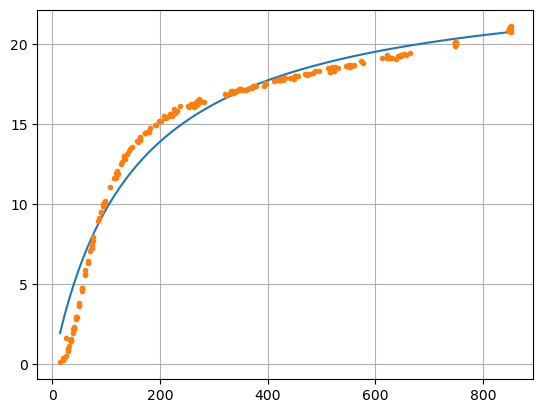

In [ ]:
xx = np.linspace(min(x),max(x),100)
yy = (pos[0] +pos[1]*xx +pos[2]*xx**2 +pos[3]*xx**3) / (1 +pos[4]*xx +pos[5]*xx**2 +pos[6]*xx**3)
plt.plot(xx,yy), plt.plot(x,y,'.'), plt.grid('on')
plt.show()

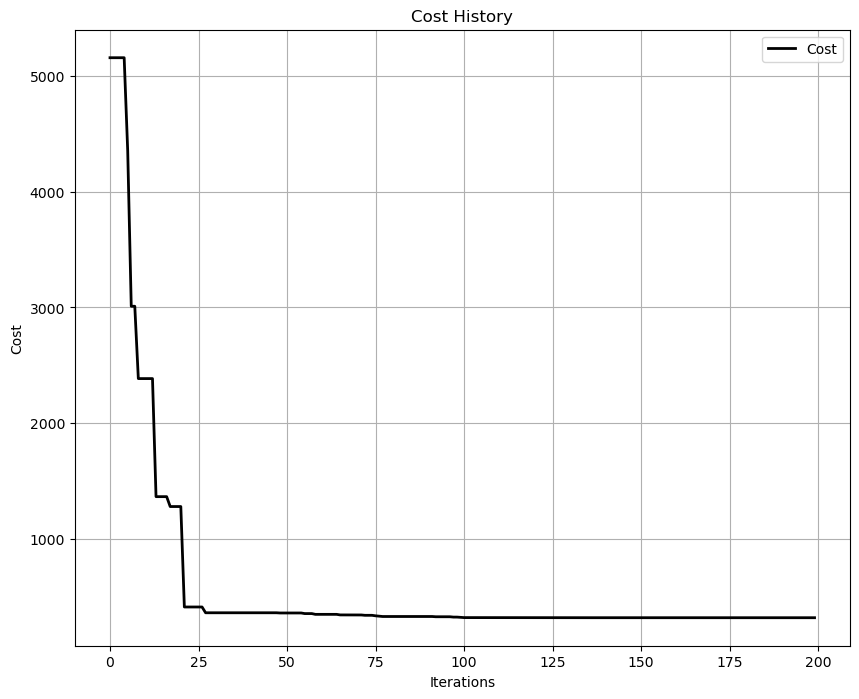

In [ ]:
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()